In [0]:
import pandas as pd
import numpy as np
from google.cloud import bigquery
import pandas_gbq
import pydata_google_auth
import os
import matplotlib.pyplot as plt

In [0]:
from google.cloud import bigquery
import pandas_gbq
import pydata_google_auth

In [0]:
SCOPES = [
    'https://www.googleapis.com/auth/cloud-platform',
    'https://www.googleapis.com/auth/drive',
]

In [0]:
credentials = pydata_google_auth.get_user_credentials(
    SCOPES,
    # Set auth_local_webserver to True to have a slightly more convienient
    # authorization flow. Note, this doesn't work if you're running from a
    # notebook on a remote sever, such as over SSH or with Google Colab.
    auth_local_webserver=False,
)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=UFaZ4Xv96adofJnFZoZAwMIx7V40AQ&prompt=consent&access_type=offline
Enter the authorization code: 4/uQE9pHvHttuvU14Py3r1qWDV5RfNW1ENx3IE0U4p1xwi3rG6viXm5e8


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install Pillow

In [0]:
 from PIL import Image

In [0]:
original_data= pandas_gbq.read_gbq('''SELECT nested_answer FROM `infra-211714.is_dashboard.clientformdatas_answer_googlebolo` where nested_question="16.017"
  ''',
  project_id="infra-211714",
  credentials=credentials,)

In [0]:
original_data.nested_answer.head()

0    https://storage.googleapis.com/internetsaathi-...
1    https://storage.googleapis.com/internetsaathi-...
2    https://storage.googleapis.com/internetsaathi-...
3    https://storage.googleapis.com/internetsaathi-...
4    https://storage.googleapis.com/internetsaathi-...
Name: nested_answer, dtype: object

In [0]:
links=list(original_data.nested_answer)

In [0]:
links[1]

'https://storage.googleapis.com/internetsaathi-prod/bb76f325-f43d-4ce9-b5cc-5abfdee55a88.jpg'

In [0]:
from scipy import linalg, mat, dot

In [0]:
import urllib
from urllib.request import urlopen

In [0]:
photo=[]
for i in range(1,8):
  photo.append(Image.open(urlopen(links[i])))

In [0]:
index=[]
photo=[]
for i in range(1,8):
  index.append("image_{num}.jpg".format(num=i))
  photo.append(Image.open(urlopen(links[i])))

In [0]:
images = dict(zip(index, photo))

'image_2.jpg'

In [0]:
for index,image in enumerate (photo):
  print(index,image)

0 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x816 at 0x7F22EE7ABEF0>
1 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x816 at 0x7F22EE7ABFD0>
2 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x816 at 0x7F22EE7ABDD8>
3 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x816 at 0x7F22EE7ABCC0>
4 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x816 at 0x7F22EE7ABF98>
5 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x816 at 0x7F22EE7ABE48>
6 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x816 at 0x7F22EE7ABF60>


In [0]:
def difference_score_dict(image_list):
    ds_dict = {}
    similar = []
    for image in image_list:
        ds = difference_score(image)
        
        if image not in ds_dict:
            ds_dict[image] = ds
        else:
            similar.append((image, ds_dict[image]) )
    
    return  similar, ds_dict

In [0]:
def difference_score(image, height = 30, width = 30):
    gray = img_gray(image)
    row_res, col_res = resize(gray, height, width)
    difference = intensity_diff(row_res, col_res)
    
    return difference

In [0]:
def img_gray(image):
  """ Convert image into grayscale """
  image = plt.imread(image)
  return np.average(image, weights=[0.299, 0.587, 0.114], axis=2)

In [0]:
similar, ds_dict =difference_score_dict(photo)

TypeError: ignored

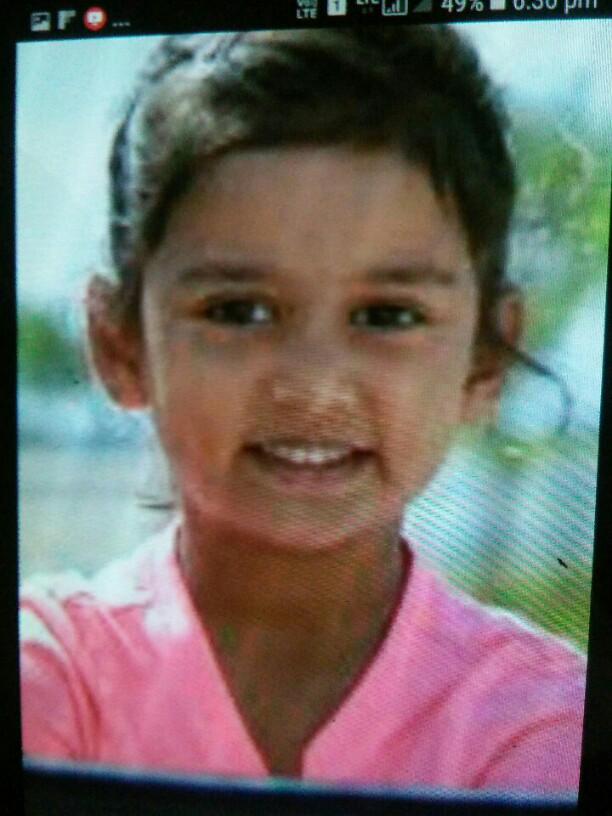

In [0]:
photo[3]

In [0]:
def dot_product(a,b):
  dp=np.sum(np.multiply(a,b)/linalg.norm(a)/linalg.norm(b))
  return dp

In [0]:
def show_image(i):
  return Image.open(urlopen(links[i]))

In [0]:
im1=np.array(Image.open(urlopen(links[2])))
im2=np.array(Image.open(urlopen(links[21])))

In [0]:
dot_product(im1, im2)

0.010850316143673567

In [0]:
links[0]

'https://storage.googleapis.com/internetsaathi-prod/5c05f8d6-799d-4045-836a-3ae381be12e3.jpg'

In [0]:
sim=[]
ind=[]
for i in range(len(links[:50])):
  a=np.array(Image.open(urlopen(links[i])))
  b=np.array(Image.open(urlopen(links[2])))
  if a.shape==b.shape:
    sim.append(100*dot_product(a,b))
    ind.append(i)

df=pd.DataFrame()
df["ind_value"]=pd.Series(ind)
df["sim_value"]=pd.Series(sim)

In [0]:
len(df)

38

In [0]:
pip install imagehash

     |████████████████████████████████| 296kB 2.8MB/s 


In [0]:
from PIL import Image
import imagehash

In [0]:
hash0 = imagehash.average_hash(Image.open(urlopen(links[0]))) 
hash1 = imagehash.average_hash(Image.open(urlopen(links[0]))) 

In [0]:
sim=[]
ind=[]
for i in range(0,len(links[:300])):
  a=np.array(Image.open(urlopen(links[i])))
  b=np.array(Image.open(urlopen(links[112])))
  if a.shape==b.shape:
    hash0=imagehash.average_hash(Image.open(urlopen(links[i])))
    hash1=imagehash.average_hash(Image.open(urlopen(links[112])))
    diff=hash0-hash1
    if diff<5 or diff>0:
      sim.append(diff)
      ind.append(i)

df=pd.DataFrame()
df["ind_value"]=pd.Series(ind)
df["sim_value"]=pd.Series(sim)

In [0]:
df.sort_values("sim_value", ascending=False).head(2)

,ind_value,sim_value
172,250,51
193,279,47


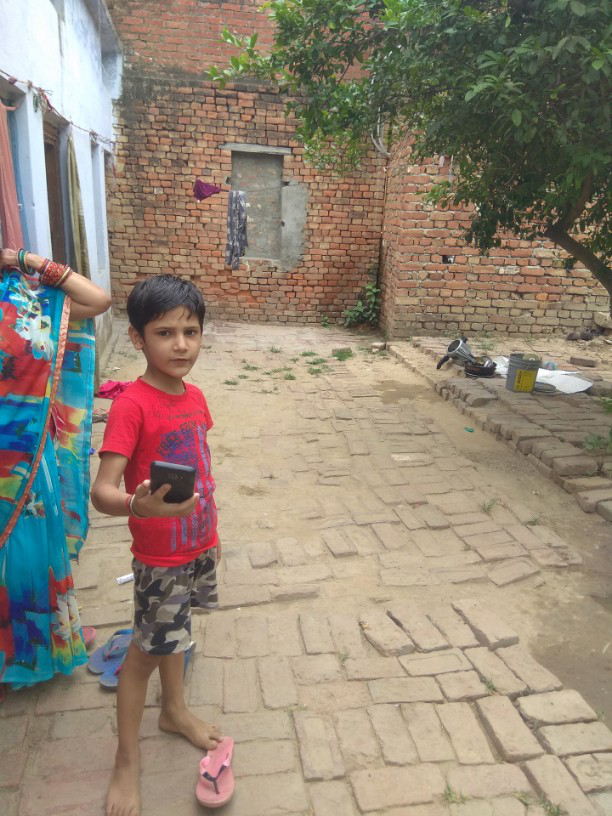

In [0]:
show_image(250)

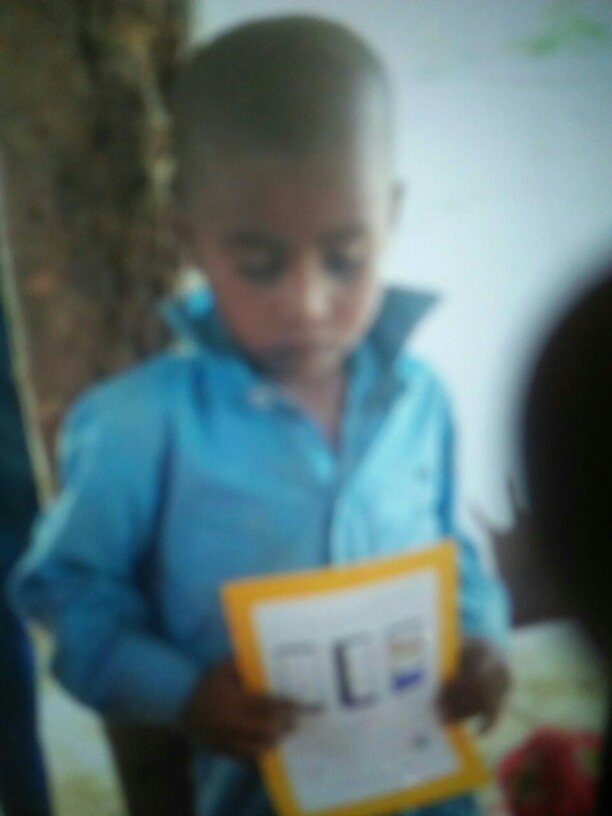

In [0]:
show_image(122)

In [0]:
for i in range(0,5):
  print(i)

0
1
2
3
4


In [0]:
hash1=imagehash.average_hash(Image.open(urlopen(links[112])))

In [0]:
hash2=imagehash.average_hash(Image.open(urlopen(links[112])))

In [0]:
hash1

array([[False, False, False,  True,  True,  True,  True,  True],
       [False, False,  True,  True, False,  True,  True,  True],
       [False,  True,  True,  True, False,  True,  True, False],
       [ True,  True,  True,  True, False, False, False, False],
       [ True,  True, False, False, False, False, False, False],
       [ True,  True, False, False, False, False, False, False],
       [False,  True, False, False, False, False, False, False],
       [ True,  True,  True, False, False, False, False, False]])

In [0]:
hash2

array([[False, False, False,  True,  True,  True,  True,  True],
       [False, False,  True,  True, False,  True,  True,  True],
       [False,  True,  True,  True, False,  True,  True, False],
       [ True,  True,  True,  True, False, False, False, False],
       [ True,  True, False, False, False, False, False, False],
       [ True,  True, False, False, False, False, False, False],
       [False,  True, False, False, False, False, False, False],
       [ True,  True,  True, False, False, False, False, False]])

In [0]:
df.sort_values("sim_value", ascending=False).head(1)

,ind_value,sim_value
20,28,44


In [0]:
for i in range(0,5):
  show_image(i)

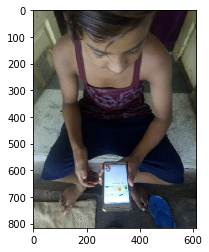

In [0]:
plt.imshow(np.array(Image.open(urlopen(links[2]))))

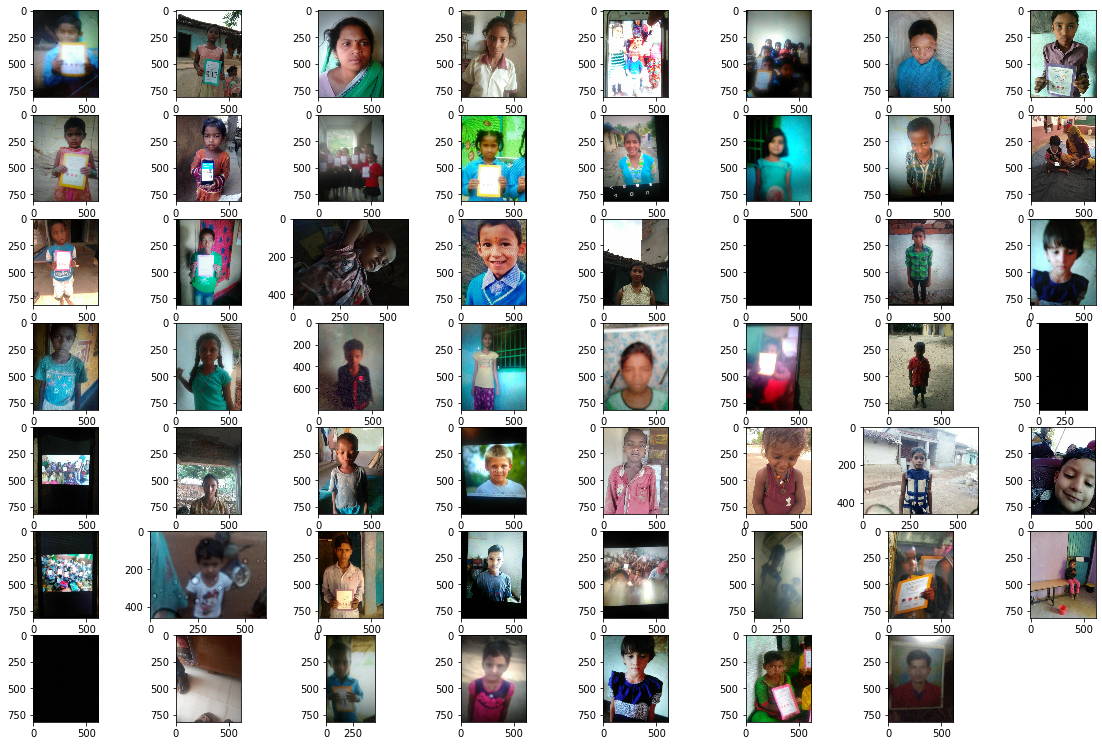

In [0]:
fig=plt.figure(figsize=(20,15))
for i in range(25,80):
    img = np.array(Image.open(urlopen(links[i])))
    fig.add_subplot(8,8,i-24)
    plt.imshow(img)
plt.show()